# Treinamento de uma rede neural convolucional para classificar imagens do dataset CIFAR10

In [1]:
import numpy as np

In [2]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD

Using TensorFlow backend.


# Carregando os dados

In [3]:
cifar10 = np.load("cifar10_preparado.npz")

In [5]:
x_train = cifar10['x_train']
x_val = cifar10['x_val']
x_test = cifar10['x_test']
y_train = cifar10['y_train']
y_val = cifar10['y_val']
y_test = cifar10['y_test']

# Definindo a rede neural

In [15]:
entrada = Input(shape=(x_train.shape[1:]))
conv1 = Conv2D(32, 3, activation='relu')(entrada)
max1 = MaxPooling2D()(conv1)
conv2 = Conv2D(64, 3, activation='relu')(max1)
max2 = MaxPooling2D()(conv2)
conv3 = Conv2D(128, 3, activation='relu')(max2)
max3 = MaxPooling2D()(conv3)
flatten = Flatten()(max3)
densa1 = Dense(512, activation='relu')(flatten)
densa2 = Dense(512, activation='relu')(densa1)
saida = Dense(10, activation='softmax')(densa2)

In [16]:
classificador = Model(entrada, saida)
classificador.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 128)         0         
__________

In [17]:
sgd = SGD(lr=0.001)
classificador.compile(optimizer = sgd, loss='categorical_crossentropy')

# Treinamento

In [18]:
from keras.utils import to_categorical

In [19]:
# A saída deve ser um vetor com 10 elementos, um para cada classe, o qual terá o número 1 na posição correspondente 
# à classe e 0 nas demais posições. Utilizaremos a função to_categorical para fazer isso
to_categorical(y_train[:5], num_classes=10)

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [20]:
BATCH_SIZE = 64
NUM_EPOCHS = 70

In [21]:
model_checkpoint = ModelCheckpoint("classificador_epoch_{epoch:02d}.hdf5", save_best_only=True)

In [22]:
history = classificador.fit(x=x_train, y=to_categorical(y_train, 10), batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, 
                            validation_data=(x_val, to_categorical(y_val, 10)), callbacks=[model_checkpoint])

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/70
40000/40000 [==============================] - 82s 2ms/step - loss: 2.7277 - val_loss: 1.6531
Epoch 2/70
40000/40000 [==============================] - 130s 3ms/step - loss: 1.6186 - val_loss: 1.5820
Epoch 3/70
40000/40000 [==============================] - 141s 4ms/step - loss: 1.4911 - val_loss: 1.4382
Epoch 4/70
40000/40000 [==============================] - 147s 4ms/step - loss: 1.4115 - val_loss: 1.3471
Epoch 5/70
40000/40000 [==============================] - 151s 4ms/step - loss: 1.3504 - val_loss: 1.4198
Epoch 6/70
40000/40000 [==============================] - 152s 4ms/step - loss: 1.2975 - val_loss: 1.3418
Epoch 7/70
40000/40000 [==============================] - 150s 4ms/step - loss: 1.2541 - val_loss: 1.2762
Epoch 8/70
40000/40000 [==============================] - 150s 4ms/step - loss: 1.2141 - val_loss: 1.2292
Epoch 9/70
40000/40000 [==============================]

## Curva de aprendizado

In [27]:
losses = np.array(history.history['loss'])
val_losses = np.array(history.history['val_loss'])
np.savez("curva_aprendizado_classificador.npz", losses=losses, val_losses=val_losses)

In [23]:
import matplotlib.pyplot as plt

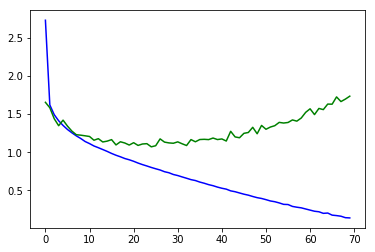

In [24]:
plt.plot(range(len(history.history['loss'])), history.history['loss'], 'b')
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], 'g')

# O que aconteceu? Overfitting!

# Testando o melhor modelo

In [25]:
from keras.models import load_model
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [26]:
# no meu caso foi o de época 25, mas ao rodar localmente o nome do melhor modelo será outro.
# use o que obteve a menor validation loss
melhor_modelo = load_model("classificador_epoch_25.hdf5")

In [28]:
predicoes = melhor_modelo.predict(x_test)

In [29]:
predicoes[0]

array([3.4555880e-04, 1.0915949e-03, 1.9052565e-03, 9.4440174e-01,
       8.5726818e-03, 2.3474267e-02, 9.6703917e-03, 7.2622090e-05,
       1.0403846e-02, 6.2060892e-05], dtype=float32)

In [30]:
# classe predita
np.argmax(predicoes[0])

3

In [31]:
# Confiança = 94,4%
predicoes[0][3]

0.94440174

In [32]:
predicoes.shape

(10000, 10)

In [33]:
y_test.shape

(10000, 1)

In [34]:
np.argmax(predicoes, axis=1).shape

(10000,)

In [35]:
print(classification_report(y_test, np.argmax(predicoes, axis=1)))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67      1000
           1       0.75      0.75      0.75      1000
           2       0.52      0.52      0.52      1000
           3       0.43      0.48      0.45      1000
           4       0.56      0.60      0.58      1000
           5       0.53      0.56      0.54      1000
           6       0.78      0.64      0.70      1000
           7       0.69      0.68      0.68      1000
           8       0.73      0.76      0.74      1000
           9       0.72      0.69      0.70      1000

   micro avg       0.63      0.63      0.63     10000
   macro avg       0.64      0.63      0.63     10000
weighted avg       0.64      0.63      0.63     10000



In [36]:
print(accuracy_score(y_test, np.argmax(predicoes, axis=1)))

0.6326


In [37]:
print(f1_score(y_test, np.argmax(predicoes, axis=1), average="weighted"))

0.6347981862185212


In [38]:
# Na matriz de confusão nota-se que as classes cachorro e gato são as mais confundidas entre si
matriz_confusao = confusion_matrix(y_test, np.argmax(predicoes, axis=1))
print(matriz_confusao)

[[654  38  71  32  35   7   9  13 104  37]
 [ 31 750   9  18  10   7   9   9  41 116]
 [ 62   9 523  88 112  85  46  44  20  11]
 [ 21  14  82 479  79 189  41  58  17  20]
 [ 27   6  93  71 598  61  34  87  19   4]
 [ 13   9  83 207  53 560  11  49   9   6]
 [  6  10  61 106  94  36 641  18  10  18]
 [ 14  10  46  58  73  89   8 678   4  20]
 [ 81  46  15  28  11  11   6   6 758  38]
 [ 34 113  14  28  11  16  16  27  56 685]]


In [39]:
total_predito = np.sum(matriz_confusao, axis=0)
print(total_predito)

[ 943 1005  997 1115 1076 1061  821  989 1038  955]


In [41]:
acertos = [matriz_confusao[i][i] for i in range(10)]
acertos = np.array(acertos)
print(acertos)

[654 750 523 479 598 560 641 678 758 685]


In [42]:
acertos > total_predito

array([False, False, False, False, False, False, False, False, False,
       False])

In [43]:
erros = total_predito - acertos
print(erros)

[289 255 474 636 478 501 180 311 280 270]


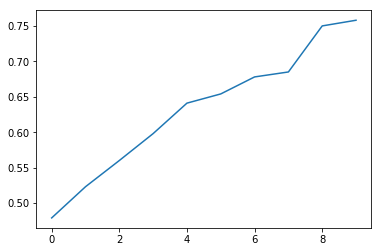

In [45]:
acuracia = acertos / 1000
plt.plot(range(10), sorted(acuracia))